# Diabetes data modeling

## Preliminaries

### Import some basic modules

In [1]:
from sklearn import datasets
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Read the data

In [2]:
dat = datasets.load_diabetes()

In [3]:
dat.keys()

dict_keys(['data', 'target'])

Data has been already normalized to mean = 0 and equal standard deviations

In [4]:
x = dat['data']
y = dat['target']

In [5]:
df = pd.DataFrame(x)

### Prepare cross-validation environment

In [6]:
from sklearn.model_selection import KFold
def check_model(md, n_spl=3, x=np.array(df)):
    kf = KFold(n_splits=n_spl)
    lst = list()
    for tr, te in kf.split(x):
        x_tr = x[tr, :]
        y_tr = y[tr]
        x_te = x[te, :]
        y_te = y[te]
        md.fit(x_tr, y_tr)
        y_pr = md.predict(x_te)
        sc = md.score(x_te, y_te)
        lst.append(sc)
    out = np.array(lst).mean()
    print('mean models score {0:6.3f}'.format(out))

## Testing models

### Ordinary linear regression

Ordinary linear regression, that is, minimization of $$ \|x'w-y\|_2^2 $$ with with respect to weights $w$

In [7]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
check_model(reg, n_spl=5)

mean models score  0.482


### Ridge regression

Ridge regression, regularization $L_2$, that is, minimization of $$ \|x'w-y\|_2^2 + \alpha\|w\|_2^2 $$ with respect to weights $w$

In [8]:
reg = linear_model.Ridge (alpha = 0.0001)
check_model(reg, n_spl=5)

mean models score  0.482


In [9]:
reg = linear_model.Ridge (alpha = 0.5)
check_model(reg, n_spl=5)

mean models score  0.452


Regularization decreases the model $R^2$ score

### Lasso regression 

Lasso model, minimization of $$ \frac1{2n}\|x'w-y\|_2^2+\alpha\|w\|_1 $$ with respect to $w$.

In [10]:
reg = linear_model.Lasso(alpha = 0.3)
check_model(reg, n_spl=3)

mean models score  0.470


### Random forest

In [11]:
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor(n_estimators=30)
check_model(reg, n_spl=3)

mean models score  0.436


Random forest with number of trees between 10 and 500 (the best number is around 20) behaves slightly worse than linear models.

## Graph comparison

Now split the sample to train and test part, fit each model on the train part, use the model for prediction on the test part, and scatter actual test y's with predicted y's

### Separation code

In [12]:
from sklearn.model_selection import train_test_split
x_tr, x_te, y_tr, y_te = train_test_split(x,y)

In [13]:
def scatter_one(md, tit='Some model'):
    md.fit(x_tr, y_tr)
    y_pr = md.predict(x_te)
    print('score of the model {0:6.3f}'.format(md.score(x_te, y_te)))
    plt.scatter(y_te, y_pr)
    plt.xlabel('y actual')
    plt.ylabel('y predicted')
    plt.title(tit)

score of the model  0.498


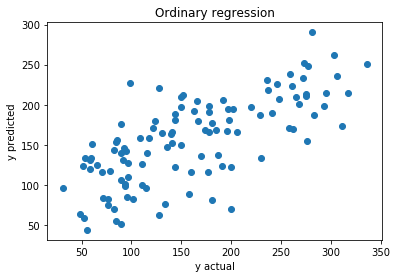

In [14]:
reg = linear_model.LinearRegression()
scatter_one(reg, tit='Ordinary regression')

score of the model  0.498


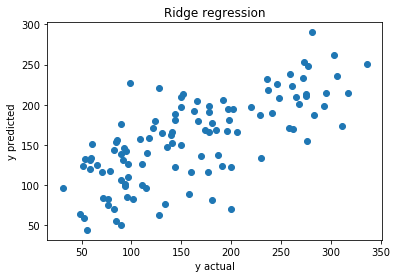

In [15]:
reg = linear_model.Ridge (alpha = 0.0001)
scatter_one(reg, tit='Ridge regression')

score of the model  0.467


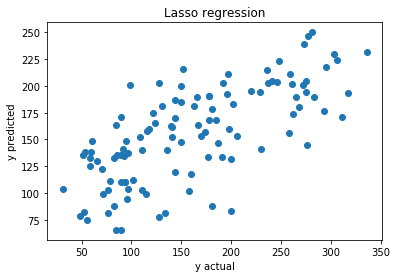

In [16]:
reg = linear_model.Lasso(alpha = 0.3)
scatter_one(reg, tit='Lasso regression')

score of the model  0.429


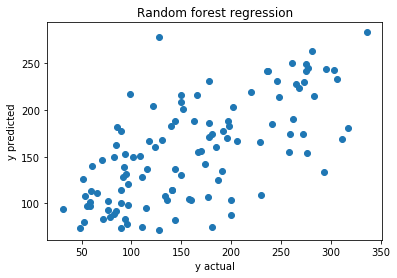

In [17]:
reg = RandomForestRegressor(n_estimators=60)
scatter_one(reg, tit='Random forest regression')